In [2]:
%matplotlib notebook
import glob
from glob import glob
import matplotlib.pyplot as plt


In [3]:
fls = glob('/Users/rsimons/Desktop/foggie/outputs/identify_satellites/*sat_mass_profiles.npy')
sat_cat = ascii.read('/Users/rsimons/Desktop/foggie/outputs/identify_satellites/satellite_locations.cat')

<IPython.core.display.Javascript object>


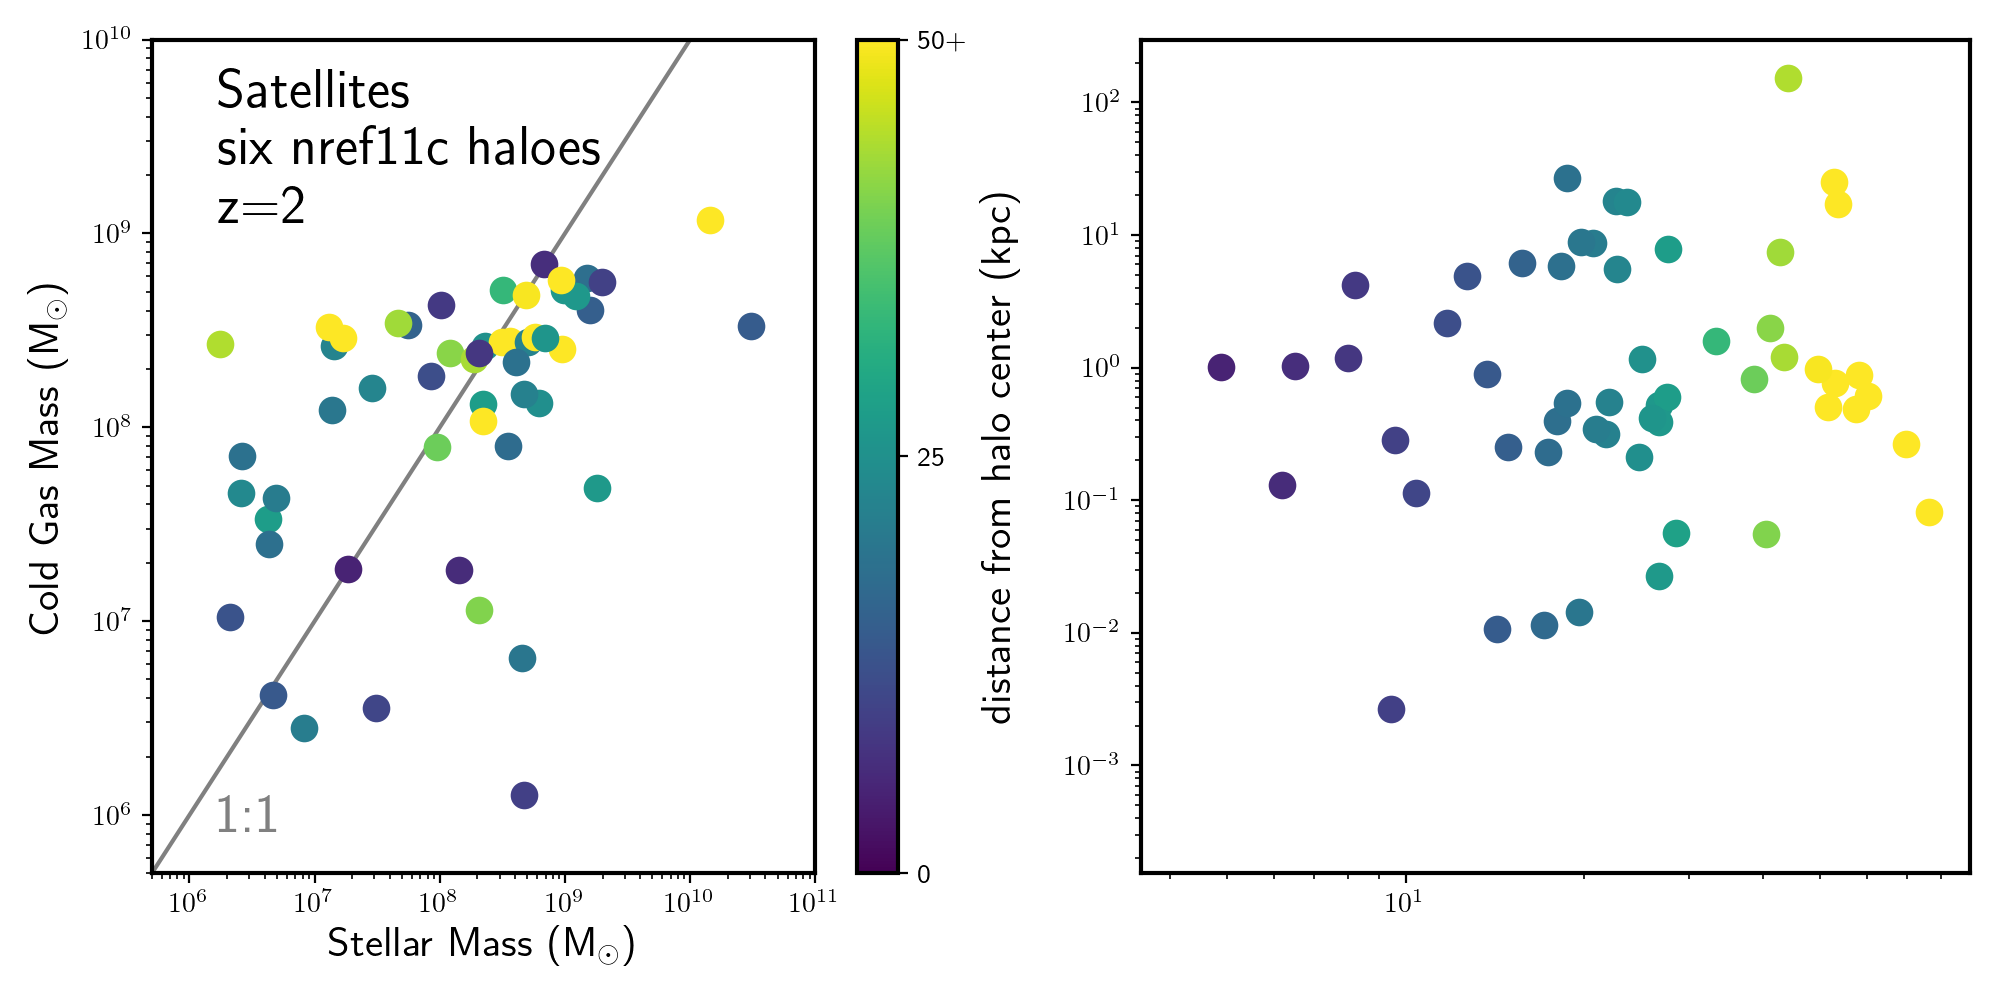

In [86]:
fig, axes = plt.subplots(1,2,figsize = (10,5))
for f, fl in enumerate(fls):
    sat_profiles = np.load(fl, allow_pickle = True)[()]
    halo = fl.split('/')[-1].split('_')[1].strip('00')
    for key in sat_profiles.keys(): 
        if key == '0': continue
        sat_profile = sat_profiles[key]
        gd = where((sat_cat['id'] == key) & (sat_cat['halo'] == int(halo)))
        #ax.plot(sat_profile['radius'], sat_profile['gas_mass'], color = 'black')
        #ax.plot(sat_profile['radius'], sat_profile['cold_gas_mass'], color = 'blue')
        #ax.plot(sat_profile['radius'], sat_profile['stars_mass'], color = 'red')        
        inside = where(sat_profile['radius'] < 2)
        star_mass = sat_profile['stars_mass'][inside][-1].value
        gas_mass = sat_profile['gas_mass'][inside][-1].value
        cold_mass = sat_profile['cold_gas_mass'][inside][-1].value
        dist_halo = sat_cat['distance_halo'][gd].data[0]
        if dist_halo < 15:
            c = 'blue'
        elif dist_halo < 40:
            c = 'red'
        else:
            c = 'black'
        c_scale = min([dist_halo/50., 1.])

        c = plt.cm.viridis(c_scale)
        ss = axes[0].scatter(star_mass, cold_mass, marker = 'o', color = c, cmap  = plt.cm.viridis, s = 80)
        axes[1].scatter(dist_halo, cold_mass/star_mass, marker = 'o',  color = c, cmap  = plt.cm.viridis, s = 80 )
        
cbar = fig.colorbar(ss, ax = axes[0])
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '25', '50+'])
cbar.set_label('distance from halo center (kpc)')
axes[0].plot([0, 1.e11], [0,1.e11], '-', color = 'grey', zorder = 0)
axes[0].set_xlim(5.e5, 1.e11)
axes[0].set_ylim(5.e5, 1.e10)


axes[0].annotate('Satellites\nsix nref11c haloes', (0.1, 0.85), xycoords = 'axes fraction', fontsize = 20)
axes[0].annotate(r'z=2', (0.1, 0.78), xycoords = 'axes fraction', fontsize = 20)
axes[0].annotate(r'1:1', (0.1, 0.05), xycoords = 'axes fraction', fontsize = 20, color = 'grey')


axes[0].set_xlabel('Stellar Mass (M$_{\odot}$)')
axes[0].set_ylabel('Cold Gas Mass (M$_{\odot}$)')
axes[1].set_xlabel('Distance from Halo Center (kpc)')
axes[1].set_ylabel('Cold Gas Mass / Stellar Mass')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xscale('log')


fig.tight_layout()

In [44]:
plt.cm.viridis

In [98]:
c_scale

0.00046959511693485883

In [90]:
sat_cat['distance_halo'][gd].data

array([0.04695951])

In [96]:
c_scale

1